# Лабораторная 3 - Визуализация, Фида А.Д. 6135

Ссылка на датасет: https://www.kaggle.com/ronitf/heart-disease-uci

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

- age 
- sex 
- chest pain type (4 values) 
- resting blood pressure 
- serum cholestoral in mg/dl 
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved 
- exercise induced angina 
- oldpeak = ST depression induced by exercise relative to rest 
- the slope of the peak exercise ST segment 
- number of major vessels (0-3) colored by flourosopy 
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
for c in df.columns:
    print(c, len(df[c].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [5]:
#числовые признаки: age, trestbps, chol, thalach, oldpeak

### 1.1. Обычный график с matplotlib

In [6]:
plt.scatter(df.trestbps, df.chol)
plt.title('resting blood pressure by serum cholestoral in mg/dl')
plt.xlabel('trestbps')
plt.ylabel('chol');

### 1.2. Суб-графики с matplotlib

In [7]:
df.thal.unique()

array([1, 2, 3, 0], dtype=int64)

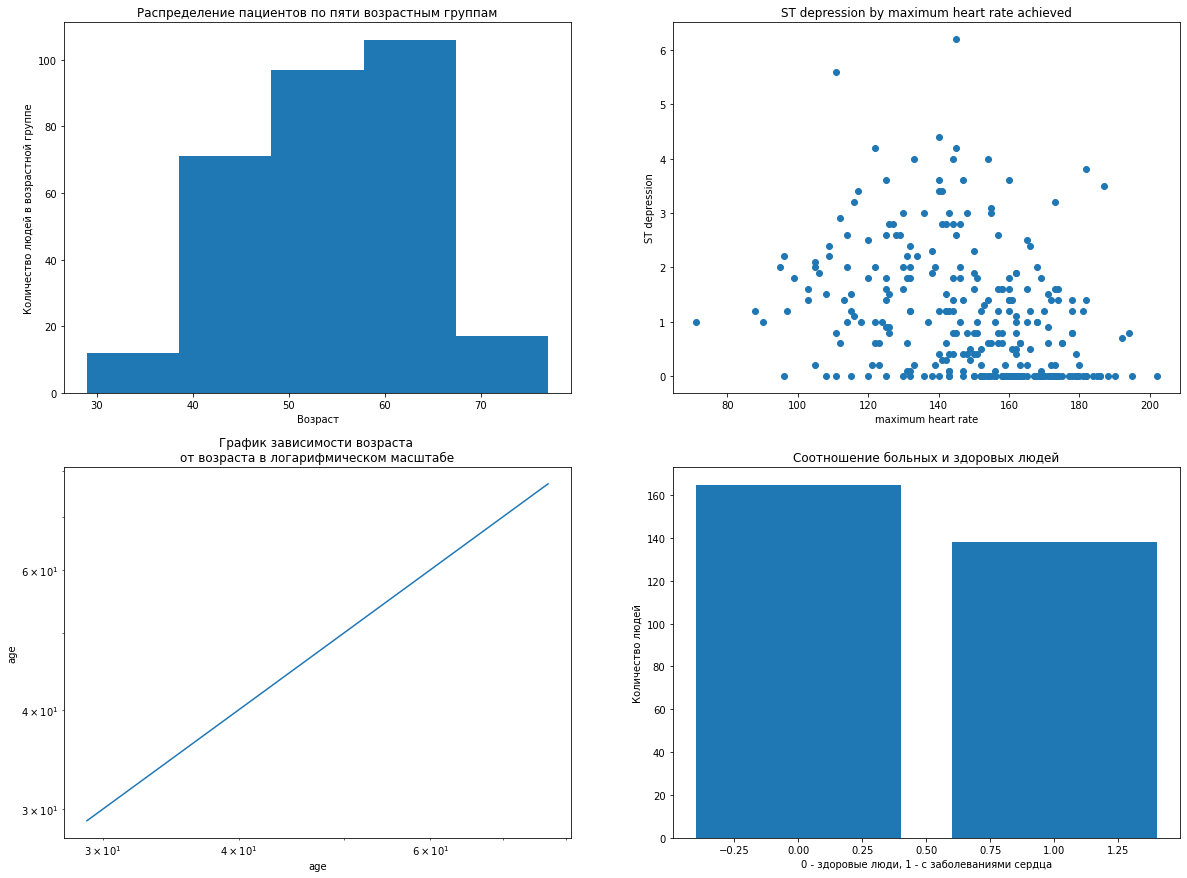

In [8]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.hist(df.age, bins=5)
plt.title('Распределение пациентов по пяти возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Количество людей в возрастной группе')

plt.subplot(2,2,2)
plt.scatter( df.thalach, df.oldpeak, label='' )
plt.title('ST depression by maximum heart rate achieved')
plt.xlabel('maximum heart rate')
plt.ylabel('ST depression')

plt.subplot(2,2,3)
plt.plot(df.age.sort_values(), df.age.sort_values())
plt.title('График зависимости возраста \nот возраста в логарифмическом масштабе')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('age')
plt.ylabel('age')

plt.subplot(2,2,4)
plt.bar(df.target.unique(), [len(df[df.target==0]), len(df[df.target==1])])
plt.title('Соотношение больных и здоровых людей')
plt.xlabel('0 - здоровые люди, 1 - с заболеваниями сердца')
plt.ylabel('Количество людей');

## 2. Графики с использованием pandas

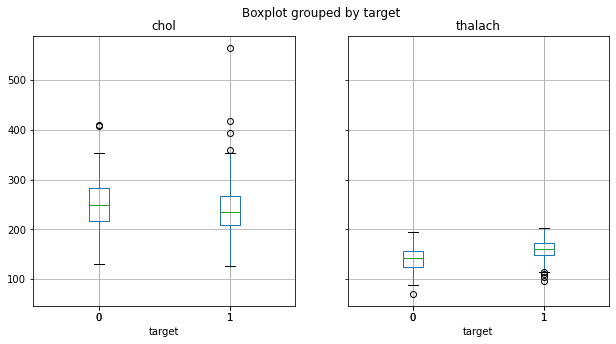

In [9]:
# boxplot из DataFrame
df.boxplot(by='target', figsize=(10,5), column=['chol', 'thalach']);

In [10]:
# график из Series
df['thalach'].plot.box()

<AxesSubplot:>

In [11]:
# ещё один график из DataFrame
df.plot.scatter(x='thalach', y='oldpeak')

<AxesSubplot:xlabel='thalach', ylabel='oldpeak'>

## 3. Графики с использованием seaborn

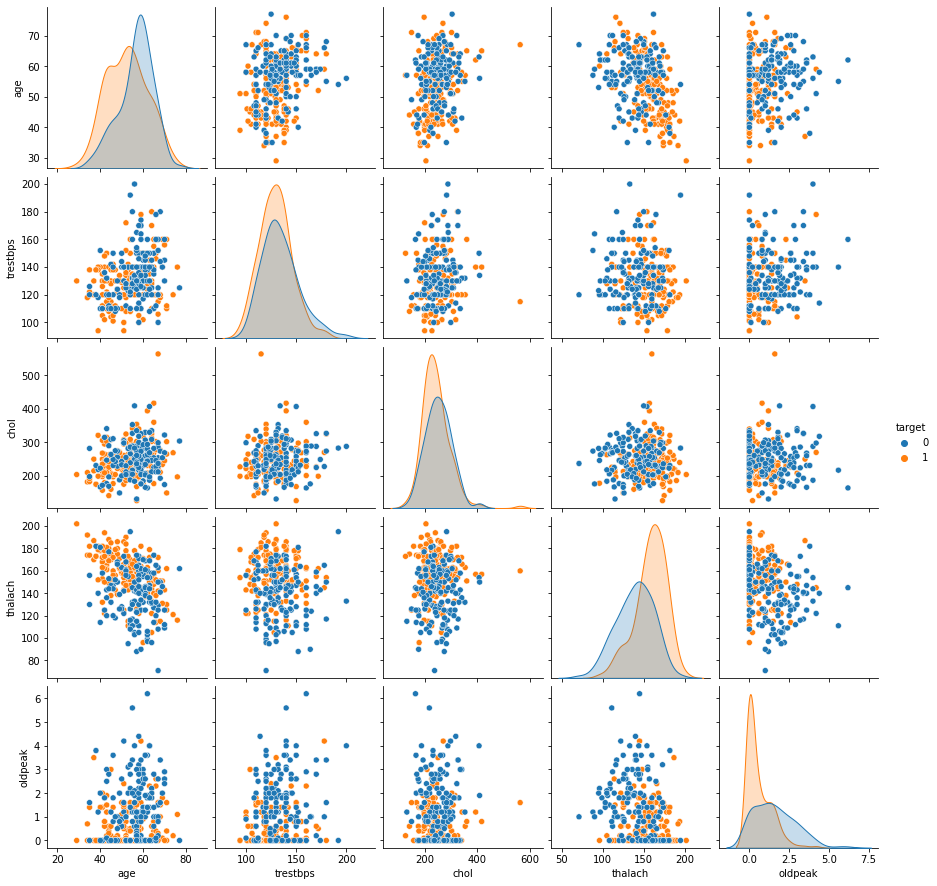

In [12]:
# pairplot для всех вещественных признаков
g = sns.pairplot(df, vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue="target", diag_kind = "kde")

По построенным графикам видно, что разделение массы людей на здоровых и больных с использованием только вещественных признаков из приведённого датасета невозможно, т.к. в проекциях на исследуемые вещественные признаки группы сильно смешаны.

Наилучшим для разделения вещественным признаком выглядит oldpeak.

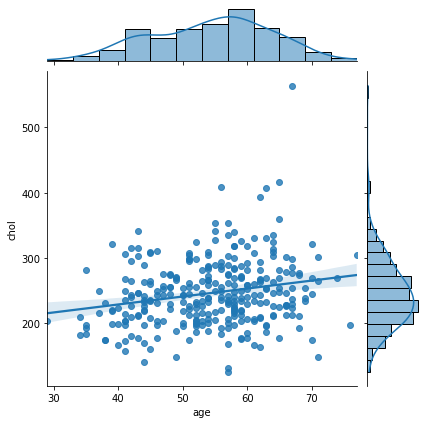

In [13]:
g = sns.jointplot( x = "age", y = "chol", kind='reg', data = df )

По построенной линии регрессии можно сказать, что в целом уровень холестерина немного возрастает с увеличением возраста. 

Распределения обоих рассматриваемых вещественных признаков достаточно гладкие, а распределение уровня холестерина вообще довольно близко к нормальному (если не учитывать "аномалию" в одном из хвостов).

In [14]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

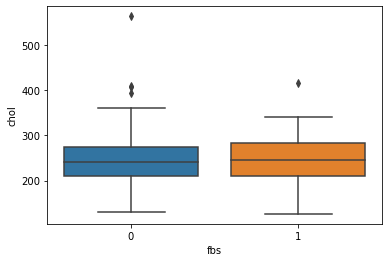

In [15]:
g = sns.boxplot(x="fbs", y="chol", data=df)

Рассматриваемый вещественный признак в разрезе категориального распределен примерно симметрично, при этом имеются статистически не значимые хвосты.

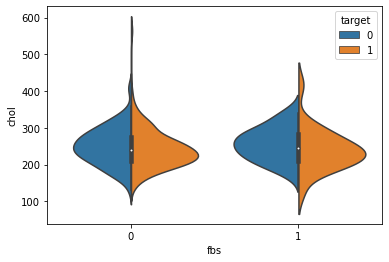

In [16]:
g = sns.violinplot(x="fbs", y="chol", hue="target", split=True, data=df)

В зависимости от наличия диагноза, распределение холестерина выглядит немного по-разному. Интересно, что мода для уровня холестерина у людей с заболеваниями сердца находится немного ниже, чем мода для уровня холестерина у здоровых людей.

<AxesSubplot:>

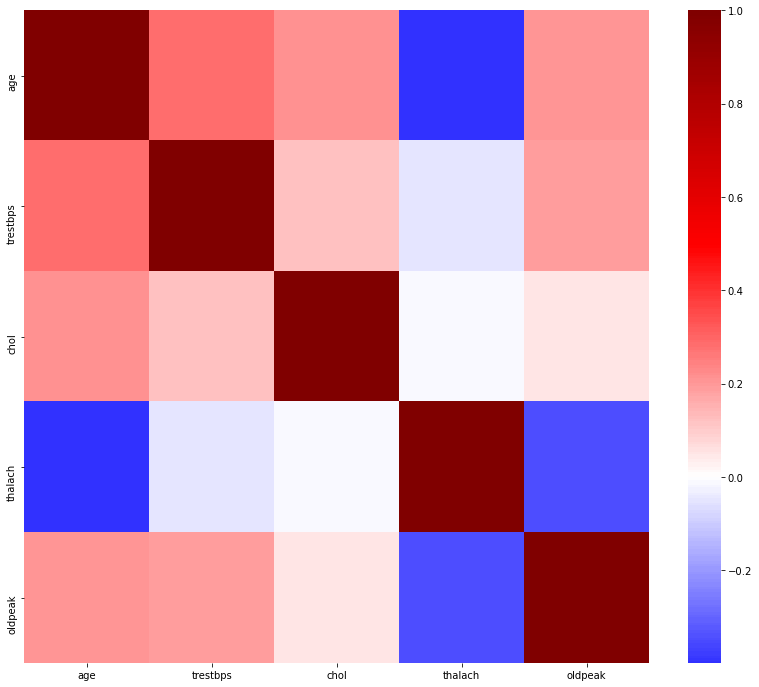

In [17]:
# heatmap для вещественных признаков
corr_matrix = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap( corr_matrix, cmap = 'seismic', center = 0, ax = ax )

<AxesSubplot:>

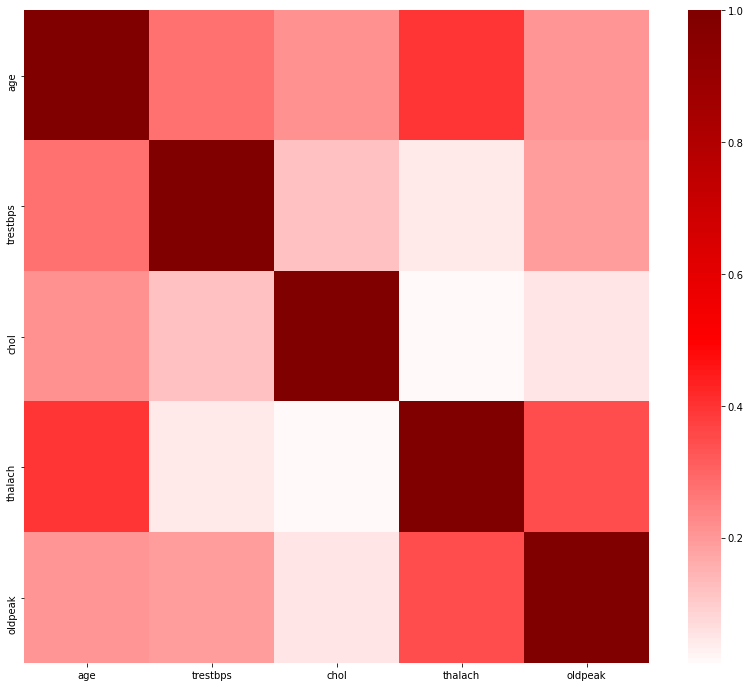

In [18]:
# более наглядно было бы посмотреть на heatmap для модуля значений из матрицы корреляци
corr_matrix = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap( np.abs(corr_matrix), cmap = 'seismic', center = 0, ax = ax )

Если построить тепловую карту таким образом, то наиболее яркие участки будут указывать на наиболее коррелирующие между собой признаки. (age и thalach, thalach и oldpeak и т.п.)

## 4. QQ-график

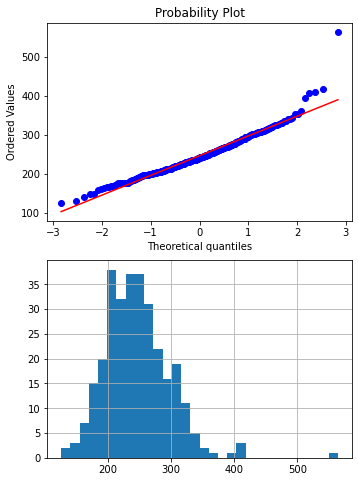

In [19]:
from scipy import stats


plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
stats.probplot( df['chol'], dist="norm", plot=plt)
plt.subplot(2,2,3)
df['chol'].hist( bins = 30 )
plt.show()

Исследуемый вещественный признак в центральной части своих значений неплохо аппроксимируется нормальным, однако хвосты распределения для данного признака сильно отличаются от хвостов нормального распределения. 

Если необходимо промоделировать величину как можно более точно, можно воспользоваться отдельно специальными распределениями для моделирования хвостов (или обобщённым гиперболическим распределеним, изменяя параметры которого можно с заданным уровнем точности приблизиться почти к любому другому распределению).

## 5. plotly

In [20]:
df['str_targ'] = df['target'].map({0:'well', 1:'disease'})
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target str_targ  
0   0     1       1  disease  
1   0     2       1  disease  
2   0     2       1  disease  
3   0     2       1  disease  
4   0     2       1  disease

In [22]:
import plotly as py
import plotly.graph_objs as go

data = [ go.Bar( x = df.age, y = df.chol ) ]

py.offline.iplot(data)

Фигура не хочет отображаться